**Stage 1: Study Replication**

The performance metrics for each dataset and classifier developed by Doppala et al. are presented in the figure below  (Doppala, Bhattacharyya, Janarthanan, & Baik, 2022).

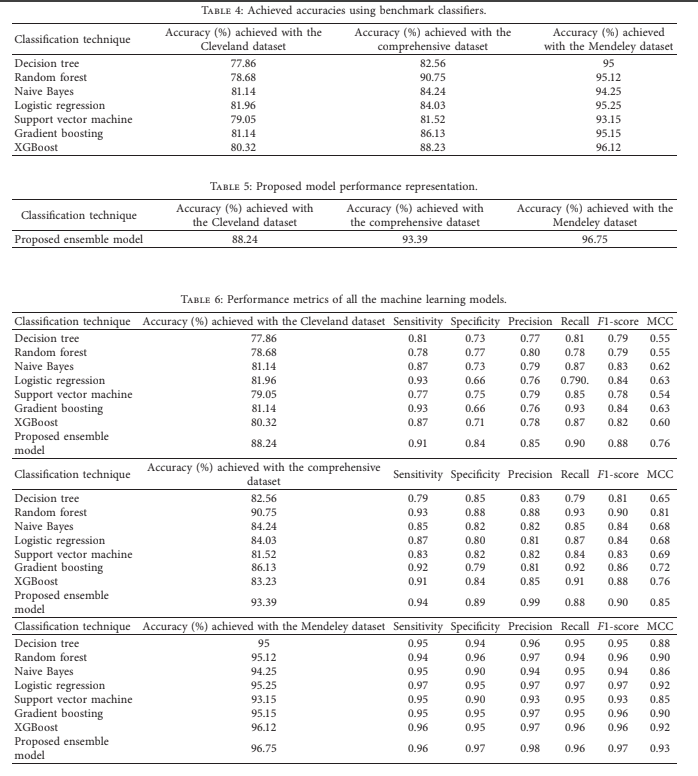

Bibliography

Doppala, B. P., Bhattacharyya, D., Janarthanan, M., & Baik, N. (2022, March 8). A Reliable Machine Intelligence Model for Accurate Identification of Cardiovascular Diseases Using Ensemble Techniques. Hindawi Journal of Healthcare Engineering, 2022. doi:https://doi.org/10.1155/2022/2585235









**Dataset 1: Cleveland Dataset**

Source: https://archive.ics.uci.edu/dataset/45/heart+disease



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
path = "/content/drive/MyDrive/CIND 820/Heart_disease_cleveland_new.csv"
data_cleveland = pd.read_csv(path,encoding='utf-8-sig')
data_cleveland.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [4]:
#Identify duplicate rows in Cleveland Clinic Data
cleveland_dups = data_cleveland[data_cleveland.duplicated(keep=False)]

#Count number of duplicate rows in Cleveland Clinic Data
if not cleveland_dups.empty:
      cleveland_dup_num = cleveland_dups.shape[0]
else:
    print("No duplicates in Cleveland dataset")

#Check for null values in Cleveland dataset
null_cleveland =data_cleveland.isna().sum().sum()
print("There are " + str(null_cleveland) + " null values in the Cleveland dataset")


No duplicates in Cleveland dataset
There are 0 null values in the Cleveland dataset


In [5]:
#ca is the number of major vessels visible under fluorscopy. Upon additional literature review, it appears that this variable is commonly treated as a categorical variable. ca will be treated as a categorical variable as noted by other researchers including Gupta et. al in MIFH: A Machine Intelligence Framework for Heart Disease Diagnosis

#Use apply function and lambda to normalize the numeric columns using the normalization formula
cleveland_categorical = data_cleveland[['sex', 'cp','fbs','restecg','exang','slope','ca','thal','target']]
data_cleveland = data_cleveland.apply(lambda x: (x-min(x))/(max(x)-min(x)) if x.name not in cleveland_categorical else x)

In [6]:
#one-hot coding of Cleveland Data categorical independent variables

#The variables treated with one-hot encoding is unclear in replication paper, however 5 variables below are commonly encoded as in MIFH: A Machine Intelligence Framework for Heart Disease Diagnosis by Gupta et. al
data_cleveland_coded = pd.get_dummies(data_cleveland, columns=['cp', 'restecg', 'slope','ca', 'thal'], prefix=['cp', 'restecg', 'slope', 'ca','thal'], drop_first=True)

In [7]:
data_cleveland_coded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_1,...,cp_3,restecg_1,restecg_2,slope_1,slope_2,ca_1,ca_2,ca_3,thal_2,thal_3
0,0.708333,1,0.481132,0.244292,1,0.603053,0,0.370968,0,0,...,0,0,1,0,1,0,0,0,1,0
1,0.791667,1,0.622642,0.365297,0,0.282443,1,0.241935,1,0,...,1,0,1,1,0,0,0,1,0,0
2,0.791667,1,0.245283,0.235160,0,0.442748,1,0.419355,1,0,...,1,0,1,1,0,0,1,0,0,1
3,0.166667,1,0.339623,0.283105,0,0.885496,0,0.564516,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0.250000,0,0.339623,0.178082,0,0.770992,0,0.225806,0,1,...,0,0,1,0,0,0,0,0,0,0


In [8]:
#Output new column names as list for ease of use in test train split below
data_cleveland_coded.columns.values

array(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang',
       'oldpeak', 'target', 'cp_1', 'cp_2', 'cp_3', 'restecg_1',
       'restecg_2', 'slope_1', 'slope_2', 'ca_1', 'ca_2', 'ca_3',
       'thal_2', 'thal_3'], dtype=object)

In [9]:
#Test Train Split

#Import applicable scikit-learn libraries
from sklearn.model_selection import train_test_split

#Divide data into independent variables and dependent variable
independent = data_cleveland_coded.loc[:,['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang','oldpeak', 'cp_1', 'cp_2', 'cp_3', 'restecg_1','restecg_2', 'slope_1', 'slope_2', 'ca_1', 'ca_2', 'ca_3','thal_2', 'thal_3']]
dependent = data_cleveland_coded.loc[:,['target']]

#Use a 60:40 test split as in CMTH642 Lab 7 and Lab 10. Assign a random_state of 0 for reproducibility of test-train split
x_train, x_test, y_train, y_test = train_test_split(independent, dependent, random_state=0, train_size = .60)

In [19]:
#Decision Tree

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

#For the purposes of the proof of concept only, I have included a calculation of computational speed and memory consumption. In the future this metric will only be calculated in stage 2
import timeit
import psutil

#Initialize the decision tree classifier and assign to variable cleveland_decision_tree. Assign random_state 0 to reproduce results
cleveland_decision_tree = DecisionTreeClassifier(random_state=42)

#Begin timing of fitting and prediction process
start_time = timeit.default_timer()

#Fit the training data set to the decision tree model
cleveland_decision_tree.fit(x_train, y_train.values.ravel()).predict(x_test)

#Predict the presence of heart disese by inputting the test data into the cleveland_decision_tree model
target_pred_decision_tree = cleveland_decision_tree.predict(x_test)

#Stop timing of fitting and prediction process
end_time = timeit.default_timer()

#Calculate total time
computational_time = end_time - start_time
#Calculate memory usage
memory_usage = psutil.Process().memory_info().rss

print("Computational Time: "+str(computational_time))
print("Memory Usage: "+str(memory_usage))

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef

accuracy_decision_tree =  round(accuracy_score(y_test, target_pred_decision_tree),4)*100
precision_decision_tree = round(precision_score(y_test, target_pred_decision_tree, pos_label=1),3)
recall_decision_tree = round(recall_score(y_test, target_pred_decision_tree, pos_label=1),3)
f1_score_decision_tree = round(f1_score(y_test, target_pred_decision_tree, pos_label=1),3)
mcc_decision_tree = round(matthews_corrcoef(y_test, target_pred_decision_tree),3)
specificity_decision_tree = round(recall_score(y_test, target_pred_decision_tree, pos_label=0),3)

#Organize performance metrics into a list
performance_decision_tree = [["Decision Tree", accuracy_decision_tree, specificity_decision_tree,precision_decision_tree,recall_decision_tree,f1_score_decision_tree,mcc_decision_tree]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_decision_tree, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_decision_tree = performance_metrics

performance_metrics

Computational Time: 0.012198120999528328
Memory Usage: 246870016


,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Decision Tree,74.59,0.85,0.816,0.645,0.721,0.505


In [84]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

#Initialize the random forest classifier and assign to variable cleveland_random_forest. Assign random_state 0 to reproduce results
cleveland_random_forest = RandomForestClassifier(random_state=42)

#Fit the training data set to the random forest classifier
cleveland_random_forest.fit(x_train, y_train.values.ravel()).predict(x_test)

#Predict the presence of heart disese by inputting the test data into the cleveland_random_forest model
target_pred_random_forest = cleveland_random_forest.predict(x_test)

accuracy_random_forest =  round(accuracy_score(y_test, target_pred_random_forest),4)*100
precision_random_forest = round(precision_score(y_test, target_pred_random_forest, pos_label=1),3)
recall_random_forest = round(recall_score(y_test, target_pred_random_forest, pos_label=1),3)
f1_score_random_forest = round(f1_score(y_test, target_pred_random_forest, pos_label=1),3)
mcc_random_forest = round(matthews_corrcoef(y_test, target_pred_random_forest),3)
specificity_random_forest = round(recall_score(y_test, target_pred_random_forest, pos_label=0),3)

#Organize performance metrics into a list
performance_random_forest = [["Random Forest", accuracy_random_forest,specificity_random_forest,precision_random_forest,recall_random_forest,f1_score_random_forest,mcc_random_forest]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_random_forest, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_random_forest = performance_metrics

performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Random Forest,75.41,0.817,0.796,0.694,0.741,0.514


In [58]:
#Naive Bayes

#The application of Naive Bayes in the paper is unclear. The dataset contains both categorical and numerical (i.e. continuous numerical) features this should be taken into consideration when applying Naive Bayes methods using sklearn
#Here we will applying different Naive Bayes classifiers to the categorical and numerical features
from sklearn.naive_bayes import  CategoricalNB, GaussianNB

#Initialize the naive bayes models and assign to variable
cleveland_naive_numerical = GaussianNB()
cleveland_naive_categorical = CategoricalNB()

#List categorical and numerical feature names
cleveland_categorical_nb = ['sex', 'fbs', 'exang','cp_1', 'cp_2', 'cp_3', 'restecg_1','restecg_2', 'slope_1', 'slope_2', 'ca_1', 'ca_2', 'ca_3','thal_2', 'thal_3']
cleveland_numerical_nb = ['age','trestbps','chol','thalach','oldpeak']

# Fit the categorical features in the training data set to the categorical naive bayes model
cleveland_naive_categorical.fit(x_train[cleveland_categorical_nb], y_train.values.ravel())

#Fit the numerical features in the training data set to the gaussian naive bayes model
cleveland_naive_numerical.fit(x_train[cleveland_numerical_nb], y_train.values.ravel())

# Predict probabilities for using categorical and numerical features
probability_categorical = cleveland_naive_categorical.predict_proba(x_test[cleveland_categorical_nb])
probability_numerical= cleveland_naive_numerical.predict_proba(x_test[cleveland_numerical_nb])

#Combine the probabilities using the product rule
total_probability = probability_categorical * probability_numerical

#We can use this code to select the class that has the greatest probability for a given row
import numpy as np
target_pred_naive = np.argmax(total_probability, axis=1)

#Calculate performance metrics
accuracy_naive =  round(accuracy_score(y_test, target_pred_naive),4)*100
precision_naive = round(precision_score(y_test, target_pred_naive, pos_label=1),3)
recall_naive = round(recall_score(y_test, target_pred_naive, pos_label=1),3)
f1_score_naive = round(f1_score(y_test, target_pred_naive, pos_label=1),3)
mcc_naive = round(matthews_corrcoef(y_test, target_pred_naive),3)
specificity_naive = round(recall_score(y_test, target_pred_naive, pos_label=0),3)

#Organize performance metrics into a list
performance_naive = [["Naive Bayes", accuracy_naive,specificity_naive,precision_naive,recall_naive,f1_score_naive,mcc_naive]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_naive, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_naive_bayes = performance_metrics

performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Naive Bayes,72.13,0.767,0.75,0.677,0.712,0.446


In [85]:
#Logistic Regression

#Import logistic regression model from scikit-learn libraries
from sklearn.linear_model import LogisticRegression

#Initialize the logistic regression model and assign to variable wine_logistic_reg variable. Assign random_state 16 to reproduce results
cleveland_logistic_reg = LogisticRegression(random_state=42)

#Fit the training data set to the logistic model
cleveland_logistic_reg.fit(x_train, y_train.values.ravel())

#Predict the presence of heart disese by inputting the test data into the cleveland_logistic_reg
target_pred_logistic = cleveland_logistic_reg.predict(x_test)

accuracy_logistic =  round(accuracy_score(y_test, target_pred_logistic),4)*100
precision_logistic = round(precision_score(y_test, target_pred_logistic, pos_label=1),3)
recall_logistic = round(recall_score(y_test, target_pred_logistic, pos_label=1),3)
f1_score_logistic = round(f1_score(y_test, target_pred_logistic, pos_label=1),3)
mcc_logistic = round(matthews_corrcoef(y_test, target_pred_logistic),3)
specificity_logistic = round(recall_score(y_test, target_pred_logistic, pos_label=0),3)

#Organize performance metrics into a list
performance_logistic = [["Logistic Regression", accuracy_logistic,specificity_logistic,precision_logistic,recall_logistic,f1_score_logistic,mcc_logistic]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_logistic, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_logistic_regression = performance_metrics

performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Logistic Regression,81.97,0.85,0.845,0.79,0.817,0.641


In [86]:
#Import support vector machine from scikit-learn libraries
from sklearn import svm

#Initialize the support vector machine classifier and assign to variable cleveland_decision_tree. Assign random_state 0 to reproduce results
cleveland_support_vector = svm.SVC(kernel='linear', random_state=42)

#Fit the training data set to the support vector machine classifier
cleveland_support_vector.fit(x_train, y_train.values.ravel()).predict(x_test)

#Predict the presence of heart disese by inputting the test data into the cleveland_support_vector
target_pred_support_vector = cleveland_support_vector.predict(x_test)

accuracy_support_vector =  round(accuracy_score(y_test, target_pred_support_vector),4)*100
precision_support_vector = round(precision_score(y_test, target_pred_support_vector, pos_label=1),3)
recall_support_vector = round(recall_score(y_test, target_pred_support_vector, pos_label=1),3)
f1_score_support_vector = round(f1_score(y_test, target_pred_support_vector, pos_label=1),3)
mcc_support_vector = round(matthews_corrcoef(y_test, target_pred_support_vector),3)
specificity_support_vector = round(recall_score(y_test, target_pred_support_vector, pos_label=0),3)

#Organize performance metrics into a list
performance_support_vector = [["Support Vector", accuracy_support_vector,specificity_support_vector,precision_support_vector,recall_support_vector,f1_score_support_vector,mcc_support_vector]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_support_vector, columns=['Model', 'Accuracy', 'Specificity','Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_support_vector = performance_metrics

performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Support Vector,81.15,0.867,0.855,0.758,0.803,0.628


In [87]:
#Gradient Boosting

#Import gradient boosting classifier from scikit-learn libraries
from sklearn.ensemble import GradientBoostingClassifier

#Initialize the support vector machine classifier and assign to variable cleveland_decision_tree. Assign random_state 42 to reproduce results
cleveland_gradient = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

#Fit the training data set to the support vector machine classifier
cleveland_gradient.fit(x_train, y_train.values.ravel()).predict(x_test)

#Predict the presence of heart disese by inputting the test data into the cleveland_gradient
target_pred_gradient = cleveland_gradient.predict(x_test)

accuracy_gradient =  round(accuracy_score(y_test, target_pred_gradient),4)*100
precision_gradient = round(precision_score(y_test, target_pred_gradient, pos_label=1),3)
recall_gradient = round(recall_score(y_test, target_pred_gradient, pos_label=1),3)
f1_score_gradient = round(f1_score(y_test, target_pred_gradient, pos_label=1),3)
mcc_gradient = round(matthews_corrcoef(y_test, target_pred_gradient),3)
specificity_gradient = round(recall_score(y_test, target_pred_gradient, pos_label=0),3)

#Organize performance metrics into a list
performance_gradient = [["Gradient Boosting", accuracy_gradient,specificity_gradient,precision_gradient,recall_gradient,f1_score_gradient,mcc_gradient]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_gradient, columns=['Model', 'Accuracy','Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_gradient = performance_metrics

performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Gradient Boosting,77.87,0.817,0.807,0.742,0.773,0.56


In [16]:
#XGBoost

#Import xgboost
import xgboost as xgb

#Initialize the support vector machine classifier and assign to variable cleveland_decision_tree. Assign random_state 0 to reproduce results
cleveland_xgb = xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.1, max_depth=3, enable_categorical=True, seed= 42)

#Fit the training data set to the support vector machine classifier
cleveland_xgb.fit(x_train, y_train.values.ravel()).predict(x_test)

#Predict the presence of heart disese by inputting the test data into the cleveland_xgb
target_pred_xgb = cleveland_xgb.predict(x_test)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

accuracy_xgb =  round(accuracy_score(y_test, target_pred_xgb),4)*100
precision_xgb = round(precision_score(y_test, target_pred_xgb, pos_label=1),3)
recall_xgb = round(recall_score(y_test, target_pred_xgb, pos_label=1),3)
f1_score_xgb = round(f1_score(y_test, target_pred_xgb, pos_label=1),3)
mcc_xgb = round(matthews_corrcoef(y_test, target_pred_xgb),3)
specificity_xgb = round(recall_score(y_test, target_pred_xgb, pos_label=0),3)

#Organize performance metrics into a list
performance_xgb = [["XGBoost", accuracy_xgb,specificity_xgb,precision_xgb,recall_xgb,f1_score_xgb,mcc_xgb]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_xgb, columns=['Model', 'Accuracy','Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_xgb= performance_metrics

performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,XGBoost,73.77,0.783,0.768,0.694,0.729,0.478


In [90]:
#Ensemble Model

#Import VotingClassifier to combine model predictions
from sklearn.ensemble import VotingClassifier

#Initialize a categorical naive bayes classifier and train using categorical training set
ensemble_categorical_nb = CategoricalNB()
ensemble_categorical_nb.fit(x_train[cleveland_categorical_nb], y_train.values.ravel())

#Initialize a gaussian naive bayes classifier and train using numerical (i.e continuous numerical features) training set
ensemble_numerical_nb = GaussianNB()
ensemble_numerical_nb.fit(x_train[cleveland_numerical_nb], y_train.values.ravel())

# Initialize remaining classifier types and fit the entire training setata
ensemble_random_forest = RandomForestClassifier(random_state = 42)
ensemble_random_forest.fit(x_train, y_train.values.ravel())

ensemble_svm = svm.SVC(probability=True, random_state = 42)
ensemble_svm.fit(x_train, y_train.values.ravel())

ensemble_gradient = GradientBoostingClassifier(random_state = 42)
ensemble_gradient.fit(x_train, y_train.values.ravel())

#Specify Algorithms and initialize ensemble model using a soft voting classifier
algorithms = [('ensemble_categorical_nb',ensemble_categorical_nb),('ensemble_numerical_nb',ensemble_numerical_nb),('ensemble_random_forest',ensemble_random_forest),('ensemble_gradient',ensemble_gradient),('ensemble_svm', ensemble_svm)]
ensemble = VotingClassifier(estimators=algorithms, voting='soft')

#Now we can fit each model to voting classifier instance, selecting the categorical variables for naive bayes categorical models
ensemble.fit(
    np.column_stack([ensemble_categorical_nb.predict_proba(x_train[cleveland_categorical_nb]),
                     ensemble_numerical_nb.predict_proba(x_train[cleveland_numerical_nb]),
                     ensemble_random_forest.predict_proba(x_train),
                     ensemble_gradient.predict_proba(x_train),
                     ensemble_svm.predict_proba(x_train)]),
    y_train.values.ravel()
)

#With the ensemble model, we can make predictions on the target values
target_pred_ensemble = ensemble.predict(
    np.column_stack([ensemble_categorical_nb.predict_proba(x_test[cleveland_categorical_nb]),
                     ensemble_numerical_nb.predict_proba(x_test[cleveland_numerical_nb]),
                     ensemble_random_forest.predict_proba(x_test),
                     ensemble_gradient.predict_proba(x_test),
                     ensemble_svm.predict_proba(x_test)])
)

accuracy_ensemble =  round(accuracy_score(y_test, target_pred_ensemble),4)*100
precision_ensemble = round(precision_score(y_test, target_pred_ensemble, pos_label=1),3)
recall_ensemble = round(recall_score(y_test, target_pred_ensemble, pos_label=1),3)
f1_score_ensemble = round(f1_score(y_test, target_pred_ensemble, pos_label=1),3)
mcc_ensemble = round(matthews_corrcoef(y_test, target_pred_ensemble),3)
specificity_ensemble = round(recall_score(y_test, target_pred_ensemble, pos_label=0),3)

#Organize performance metrics into a list
performance_ensemble = [["Ensemble", accuracy_ensemble,specificity_ensemble,precision_ensemble,recall_ensemble,f1_score_ensemble,mcc_ensemble]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_ensemble, columns=['Model', 'Accuracy','Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_ensemble = performance_metrics

performance_metrics

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Ensemble,73.77,0.783,0.768,0.694,0.729,0.478


In [91]:
#Summary table - Stage 1 Basic Results

# Use concat to append DataFrames vertically
summary = pd.concat([st1_pm_decision_tree, st1_pm_random_forest, st1_pm_naive_bayes, st1_pm_logistic_regression, st1_pm_support_vector, st1_pm_gradient, st1_pm_xgb, st1_pm_ensemble], ignore_index=True)

#Remove row index values
summary.index = ["","","","","","","",""]
summary

#Although the same procedure was followed as the research paper, the accuracy of most models does not approximate that of the study except for Logistic Regression and Support Vector.
#The Ensemble Model, XGBoost and Naive Bayes show the greatest deviaton from the study paper. Notably, the classifiers that do not match the study results are tree-based or probabilistic for Naive Bayes

,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Decision Tree,74.59,0.850,0.816,0.645,0.721,0.505
,Random Forest,75.41,0.817,0.796,0.694,0.741,0.514
,Naive Bayes,72.13,0.767,0.750,0.677,0.712,0.446
,Logistic Regression,81.97,0.850,0.845,0.790,0.817,0.641
,Support Vector,81.15,0.867,0.855,0.758,0.803,0.628
,Gradient Boosting,77.87,0.817,0.807,0.742,0.773,0.560
,XGBoost,73.77,0.783,0.768,0.694,0.729,0.478
,Ensemble,73.77,0.783,0.768,0.694,0.729,0.478


**Stage 1A: Changes to Approximate Study Accuracy**

Hyperparameter tuning will be attempted to approximate the accuracy measure of the study paper for tree-based methods.

In [14]:
#Import GridSearchCV class from sklearn library for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#Initialize the decision tree classifier
cleveland_decision_tree = DecisionTreeClassifier(random_state=42)

#A parameter grid was created using the defaults and selected integers
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [None, 1,2,10, 20, 30],
              'min_samples_split': [2, 5, 10,15,18],
              'min_samples_leaf': [1, 2, 4]}

#Initialize the GridSearchCV class using the decision model, the parameter grid and a 10-fold cross-validation
grid_cleveland_dt = GridSearchCV(cleveland_decision_tree , param_grid, cv=10)
grid_cleveland_dt.fit(x_train, y_train)

#Output the best parameters, the model is optimized based on accuracy score
best_params_dt = grid_cleveland_dt.best_params_
print(best_params_dt)

#Fit the model using athe best parameters
cleveland_decision_tree = DecisionTreeClassifier(**best_params_dt, random_state=42)
cleveland_decision_tree.fit(x_train, y_train)

# Use the best model for predictions and recalculate metrics
target_pred_decision_tree = cleveland_decision_tree.predict(x_test)

#Calculate Performance Metrics
accuracy_decision_tree =  round(accuracy_score(y_test, target_pred_decision_tree),4)*100
precision_decision_tree = round(precision_score(y_test, target_pred_decision_tree, pos_label=1), 3)
recall_decision_tree = round(recall_score(y_test, target_pred_decision_tree, pos_label=1), 3)
f1_score_decision_tree = round(f1_score(y_test, target_pred_decision_tree, pos_label=1), 3)
mcc_decision_tree = round(matthews_corrcoef(y_test, target_pred_decision_tree), 3)
specificity_decision_tree = round(recall_score(y_test, target_pred_decision_tree, pos_label=0), 3)

# Organize performance metrics into a list
performance_decision_tree = [["Decision Tree", accuracy_decision_tree, specificity_decision_tree, precision_decision_tree, recall_decision_tree, f1_score_decision_tree, mcc_decision_tree]]

# Create a DataFrame of performance metrics
grid_dt_pm = pd.DataFrame(performance_decision_tree, columns=['Model', 'Accuracy', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
grid_dt_pm.index = [""]

grid_dt_pm

#There are improvements to the metrics with the exception of specificity

{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 15}


,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Decision Tree,76.23,0.833,0.811,0.694,0.748,0.531


In [117]:
#Import GridSearchCV class from sklearn library for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#Initialize the random forest classifier and assign to variable cleveland_random_forest. Assign random_state 42 to reproduce results
cleveland_random_forest = RandomForestClassifier(random_state=42)

#A parameter grid was created using the defaults and selected integers to cycle through in order to optimize the accuracy
#These features were selected based on the values available in the sklearn documentation
param_dist = {'n_estimators': [50, 100, 200, 300],
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth': [None, 1,2,10,20,30],
              'min_samples_split': [2,3,4,5,10,15,18,20],
              'min_samples_leaf': [1,2,4,5,6]}

#Initialize the GridSearchCV class using the random forest, the parameter grid and a 10-fold cross-validation
grid_cleveland_rf = GridSearchCV(cleveland_random_forest , param_grid, cv=10)
grid_cleveland_rf.fit(x_train, y_train.values.ravel())

#Output the best parameters, the model is optimized based on accuracy score
best_params_rf = grid_cleveland_rf.best_params_
print(best_params_rf)

#Fit the model using athe best parameters
cleveland_random_forest = RandomForestClassifier(**best_params_dt, random_state=42)
cleveland_random_forest.fit(x_train, y_train.values.ravel())

# Use the best model for predictions and recalculate metrics
target_pred_random_forest = cleveland_random_forest.predict(x_test)

#Calculate Performance Metrics
accuracy_random_forest =  round(accuracy_score(y_test, target_pred_random_forest),4)*100
precision_random_forest = round(precision_score(y_test, target_pred_random_forest, pos_label=1),3)
recall_random_forest = round(recall_score(y_test, target_pred_random_forest, pos_label=1),3)
f1_score_random_forest = round(f1_score(y_test, target_pred_random_forest, pos_label=1),3)
mcc_random_forest = round(matthews_corrcoef(y_test, target_pred_random_forest),3)
specificity_random_forest = round(recall_score(y_test, target_pred_random_forest, pos_label=0),3)

# Organize performance metrics into a list
performance_decision_tree = [["Random Forest", accuracy_random_forest, specificity_random_forest, precision_random_forest, recall_random_forest, f1_score_random_forest, mcc_random_forest]]

# Create a DataFrame of performance metrics
grid_rf_pm = pd.DataFrame(performance_random_forest, columns=['Model', 'Accuracy', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
grid_rf_pm.index = [""]

grid_rf_pm

#Despite performing GridSearchCV, the accuracy remains unchanged. RandomSearchCV is attempted next

{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 18}


,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Random Forest,75.41,0.817,0.796,0.694,0.741,0.514


In [121]:
#Import RandomizedSearchCV class from sklearn library for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

#Initialize the random forest classifier and assign to variable cleveland_random_forest. Assign random_state 42 to reproduce results
cleveland_random_forest = RandomForestClassifier(random_state=42)

#A parameter grid was created using the defaults and selected integers to cycle through in order to optimize the accuracy
#These features were selected based on the values available in the sklearn documentation
param_dist = {'n_estimators': [50, 100, 200, 300],
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth': [None, 1,2,10,20,30],
              'min_samples_split': [2,3,4,5,10,15,18,20],
              'min_samples_leaf': [1,2,4,5,6]}

#Initialize the RandomizedSearchCV class using the decision model, the parameter grid and a 10-fold cross-validation
grid_cleveland_rf = RandomizedSearchCV(cleveland_random_forest , param_grid, cv=10)
grid_cleveland_rf.fit(x_train, y_train.values.ravel())

#Output the best parameters, the model is optimized based on accuracy score
best_params_rf = grid_cleveland_rf.best_params_
print(best_params_rf)

#Fit the model using athe best parameters
cleveland_random_forest = RandomForestClassifier(**best_params_dt, random_state=42)
cleveland_random_forest.fit(x_train, y_train.values.ravel())

# Use the best model for predictions and recalculate metrics
target_pred_random_forest = cleveland_random_forest.predict(x_test)

#Calculate Performance Metrics
accuracy_random_forest =  round(accuracy_score(y_test, target_pred_random_forest),4)*100
precision_random_forest = round(precision_score(y_test, target_pred_random_forest, pos_label=1),3)
recall_random_forest = round(recall_score(y_test, target_pred_random_forest, pos_label=1),3)
f1_score_random_forest = round(f1_score(y_test, target_pred_random_forest, pos_label=1),3)
mcc_random_forest = round(matthews_corrcoef(y_test, target_pred_random_forest),3)
specificity_random_forest = round(recall_score(y_test, target_pred_random_forest, pos_label=0),3)

# Organize performance metrics into a list
performance_decision_tree = [["Random Forest", accuracy_random_forest, specificity_random_forest, precision_random_forest, recall_random_forest, f1_score_random_forest, mcc_random_forest]]

# Create a DataFrame of performance metrics
grid_rf_pm = pd.DataFrame(performance_random_forest, columns=['Model', 'Accuracy', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
grid_rf_pm.index = [""]

grid_rf_pm

#Results are the same despite performing RandomSearchCV

{'min_samples_split': 18, 'min_samples_leaf': 4, 'max_depth': 20, 'criterion': 'entropy'}


,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Random Forest,75.41,0.817,0.796,0.694,0.741,0.514


In [127]:
#Gradient Boosting

#Initialize the gradient boosting classifier and assign to variable cleveland_gradient. Assign random_state 42 to reproduce results
cleveland_gradient = GradientBoostingClassifier(random_state=42)

#A parameter grid was created using selected integers to cycle through in order to optimize the accuracy
#These features were selected based on the values available in the sklearn documentation
param_dist = {'n_estimators': [50, 100, 200],
              'learning_rate': [0.01, 0.1, 0.2],
              'max_depth': [3, 4, 5],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

#Fit the training data set to the support vector machine classifier
cleveland_gradient.fit(x_train, y_train.values.ravel()).predict(x_test)

#Initialize the GridSearchCV class using the gradient boosting, the parameter grid and a 10-fold cross-validation
grid_cleveland_gb = GridSearchCV(cleveland_gradient, param_dist, cv=10)
grid_cleveland_gb.fit(x_train, y_train.values.ravel())

#Output the best parameters, the model is optimized based on accuracy score
best_params_gb = grid_cleveland_gb.best_params_
print(best_params_gb)

#Fit the model using athe best parameters
cleveland_gradient= GradientBoostingClassifier(**best_params_gb, random_state=42)
cleveland_gradient.fit(x_train, y_train.values.ravel())

#Predict the presence of heart disese by inputting the test data into the cleveland_gradient
target_pred_gradient = cleveland_gradient.predict(x_test)

accuracy_gradient =  round(accuracy_score(y_test, target_pred_gradient),4)*100
precision_gradient = round(precision_score(y_test, target_pred_gradient, pos_label=1),3)
recall_gradient = round(recall_score(y_test, target_pred_gradient, pos_label=1),3)
f1_score_gradient = round(f1_score(y_test, target_pred_gradient, pos_label=1),3)
mcc_gradient = round(matthews_corrcoef(y_test, target_pred_gradient),3)
specificity_gradient = round(recall_score(y_test, target_pred_gradient, pos_label=0),3)

#Organize performance metrics into a list
performance_gradient = [["Gradient Boosting", accuracy_gradient,specificity_gradient,precision_gradient,recall_gradient,f1_score_gradient,mcc_gradient]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_gradient, columns=['Model', 'Accuracy','Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_gradient = performance_metrics

performance_metrics

{'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,Gradient Boosting,72.13,0.8,0.769,0.645,0.702,0.45


In [18]:
#XGBoost

#Initialize the support vector machine classifier and assign to variable cleveland_decision_tree. Assign random_state 0 to reproduce results
cleveland_xgb = xgb.XGBClassifier(enable_categorical=True, seed= 42)

#A parameter grid was created using the defaults and selected integers to cycle through in order to optimize the accuracy
#These features were selected based on the values available in the sklearn documentation
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

#Initialize the RandomizedSearchCV class using the decision model, the parameter grid and a 10-fold cross-validation
grid_cleveland_xgb = GridSearchCV(cleveland_xgb , param_grid, cv=10)
grid_cleveland_xgb.fit(x_train, y_train.values.ravel())

#Output the best parameters, the model is optimized based on accuracy score
best_params_xgb = grid_cleveland_xgb.best_params_
print(best_params_xgb)

#Fit the model using athe best parameters
cleveland_xgb = xgb.XGBClassifier(**best_params_xgb, seed=42)
cleveland_xgb.fit(x_train, y_train.values.ravel())

# Use the best model for predictions and recalculate metrics
target_pred_random_forest = cleveland_xgb.predict(x_test)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

accuracy_xgb =  round(accuracy_score(y_test, target_pred_xgb),4)*100
precision_xgb = round(precision_score(y_test, target_pred_xgb, pos_label=1),3)
recall_xgb = round(recall_score(y_test, target_pred_xgb, pos_label=1),3)
f1_score_xgb = round(f1_score(y_test, target_pred_xgb, pos_label=1),3)
mcc_xgb = round(matthews_corrcoef(y_test, target_pred_xgb),3)
specificity_xgb = round(recall_score(y_test, target_pred_xgb, pos_label=0),3)

#Organize performance metrics into a list
performance_xgb = [["XGBoost", accuracy_xgb,specificity_xgb,precision_xgb,recall_xgb,f1_score_xgb,mcc_xgb]]

#Create dataframe of performance metrics
performance_metrics= pd.DataFrame(performance_xgb, columns=['Model', 'Accuracy','Specificity', 'Precision', 'Recall', 'F1 Score', 'MCC'])
performance_metrics.index = [""]

#Create copy to append to a summary table
st1_pm_xgb= performance_metrics

performance_metrics

{'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}


,Model,Accuracy,Specificity,Precision,Recall,F1 Score,MCC
,XGBoost,73.77,0.783,0.768,0.694,0.729,0.478


**Stage 2: Improvements to Classifiers**

In [20]:
import pandas as pd
path = "/content/drive/MyDrive/CIND 820/Heart_disease_cleveland_new.csv"
data_cleveland = pd.read_csv(path,encoding='utf-8-sig')
data_cleveland.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [23]:
#Use apply function and lambda to normalize the numeric columns using the normalization formula
#cleveland_categorical = data_cleveland[['sex', 'cp','fbs','restecg','exang','slope','ca','thal','target']]

# Isolate the numeric columns
#numeric_columns = data_cleveland.columns.difference(cleveland_categorical)

#Load RobustScaler class and input numeric columns
#from sklearn.preprocessing import RobustScaler
#scaler = RobustScaler()
#data_cleveland[numeric_columns] = scaler.fit_transform(data_cleveland[numeric_columns])

<Axes: >

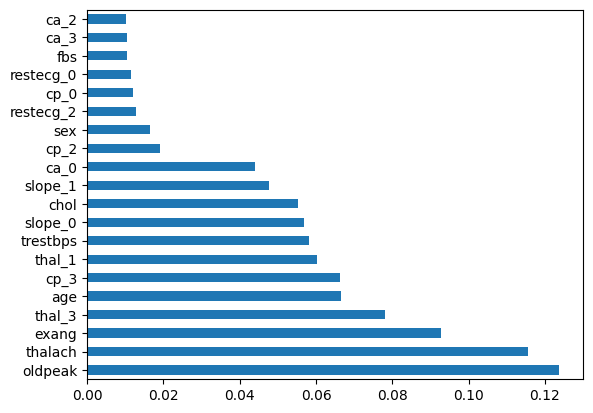

In [ ]:
#Random Forest
#Embedded Feature Selection - example

#Random Forest

from sklearn.ensemble import RandomForestClassifier

#Initialize the random forest classifier and assign to variable cleveland_decision_tree. Assign random_state 0 to reproduce results
random_forest = RandomForestClassifier(random_state=0)

#Fit the training data set to the random forest classifier
random_forest.fit(x_train, y_train.values.ravel()).predict(x_test)

(pd.Series(random_forest.feature_importances_, index=x_train.columns)
   .nlargest(20)
   .plot(kind='barh'))

#This demo shows that features importance can be displayed for random forest
#Scaling has not been completed and may change the importance of features

**Conclusions**

So far, there is more work to be done in hyperparameter tunings to approximate the accuracy of some of the classifiers